In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv(r"D:\gitClones\Machine-learning-assignment\data\WineQT_missing.csv")

In [3]:
def summarize(df):
    # Veri setinin boyutu
    print("Veri setinin boyutu:", df.shape)
    
    # Özellik sayısı
    print("Özellik sayısı:", df.shape[1])
    
    # Veri türleri
    print("\nVeri türleri:")
    print(df.dtypes)
    
    # Sınıf dağılımı (hedef değişken 'quality' olarak varsayılmıştır)
    print("\nSınıf dağılımı:")
    print(df['quality'].value_counts())
    
    # Eksik veriler
    print("\nEksik veriler:")
    missing_data = df.isnull().sum()
    print(missing_data[missing_data > 0])
    
    # Hedef değişken
    print("\nHedef değişken: quality")

# summarize fonksiyonunu çağır
summarize(df)

Veri setinin boyutu: (1143, 13)
Özellik sayısı: 13

Veri türleri:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

Sınıf dağılımı:
quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

Eksik veriler:
fixed acidity           6
volatile acidity        4
citric acid             2
residual sugar          8
chlorides               6
free sulfur dioxide     2
total sulfur dioxide    5
density                 2
pH                      2
sulphates               4
alcohol                 3
dtype: int64

Hedef değişken: quality


# **MISSING VALUES**

In [5]:
from sklearn.preprocessing import StandardScaler

In [28]:
df.isnull().sum()   

fixed acidity           6
volatile acidity        4
citric acid             2
residual sugar          8
chlorides               6
free sulfur dioxide     2
total sulfur dioxide    5
density                 2
pH                      2
sulphates               4
alcohol                 3
quality                 0
Id                      0
dtype: int64

In [6]:
X = df.drop(columns=['quality',"Id"])
y = df['quality']

In [ ]:
"""
 knn ile eksik verileri doldurmak icin standartlastirma yapilmali
 eksik verileri doldurduktan sonra feature eng icin verileri inverse transform etmek gerekebilir
"""
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.520568,0.936503,-1.366020,-0.466847,-0.231313,-0.451418,-0.364702,0.556170,1.273530,-0.572940,-0.965879
1,-0.292041,1.938757,-1.366020,0.048055,0.233207,0.914681,0.640843,0.036347,-0.707996,0.130522,-0.596113
2,-0.292041,1.270588,-1.162617,-0.172617,0.106520,-0.061104,0.244719,0.140311,-0.324475,-0.045343,-0.596113
3,1.650441,-1.402090,1.481627,-0.466847,-0.252427,0.134053,0.427546,0.660135,-0.963677,-0.455696,-0.596113
4,-0.520568,0.936503,-1.366020,-0.466847,-0.231313,-0.451418,-0.364702,0.556170,1.273530,-0.572940,-0.965879


In [ ]:
from sklearn.impute import KNNImputer

# knn imputer nesnesi
imputer = KNNImputer(n_neighbors=3)

In [ ]:
# knn ile eksik verilerin doldurulmasi
X_imputed = imputer.fit_transform(X_scaled)
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

In [10]:
X_imputed.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.520568,0.936503,-1.366020,-0.466847,-0.231313,-0.451418,-0.364702,0.556170,1.273530,-0.572940,-0.965879
1,-0.292041,1.938757,-1.366020,0.048055,0.233207,0.914681,0.640843,0.036347,-0.707996,0.130522,-0.596113
2,-0.292041,1.270588,-1.162617,-0.172617,0.106520,-0.061104,0.244719,0.140311,-0.324475,-0.045343,-0.596113
3,1.650441,-1.402090,1.481627,-0.466847,-0.252427,0.134053,0.427546,0.660135,-0.963677,-0.455696,-0.596113
4,-0.520568,0.936503,-1.366020,-0.466847,-0.231313,-0.451418,-0.364702,0.556170,1.273530,-0.572940,-0.965879


In [ ]:
# Standartlaştırılmış verilerin ters dönüşümü
X_recovered = scaler.inverse_transform(X_imputed)
X_recovered = pd.DataFrame(X_recovered, columns=X.columns)

In [ ]:
# Id ve quality sütunlarını geri ekleme
X_recovered[['quality',"Id"]] = df[['quality',"Id"]]

In [ ]:
# Eksik verilerin kontrolü
X_recovered.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

# **FEATURE ENGINEERING**

burda şarap yapımına ve özelliklerin ne işe yaradığına dair bilgimiz olmadığı için<br>
rasgtele yeni özellikler oluştururak denemeler yapıyor korelasyon matrisine göre<br>
overfitting'e sürükleme ihtimali olanları veriden çıkracağız

In [15]:
# Toplam asitlik
X_recovered['total_acidity'] = X_recovered['fixed acidity'] + X_recovered['volatile acidity'] + X_recovered['citric acid']

# Asitlik oranları 
X_recovered['fixed_volatile_ratio'] = X_recovered['fixed acidity'] / X_recovered['volatile acidity']
X_recovered['citric_fixed_ratio'] = X_recovered['citric acid'] / X_recovered['fixed acidity']

# seker/alkol orani
X_recovered['sugar_alcohol_ratio'] = X_recovered['residual sugar'] / X_recovered['alcohol']

# Şeker & Alkol skoru
X_recovered['sugar_alcohol_score'] = X_recovered['residual sugar'] * X_recovered['alcohol']

# pH ve asitlik ilişkisi
X_recovered['ph_acidity_score'] = X_recovered['pH'] * X_recovered['total_acidity']

# Sülfür oranı
X_recovered['sulfur_ratio'] = X_recovered['free sulfur dioxide'] / X_recovered['total sulfur dioxide']


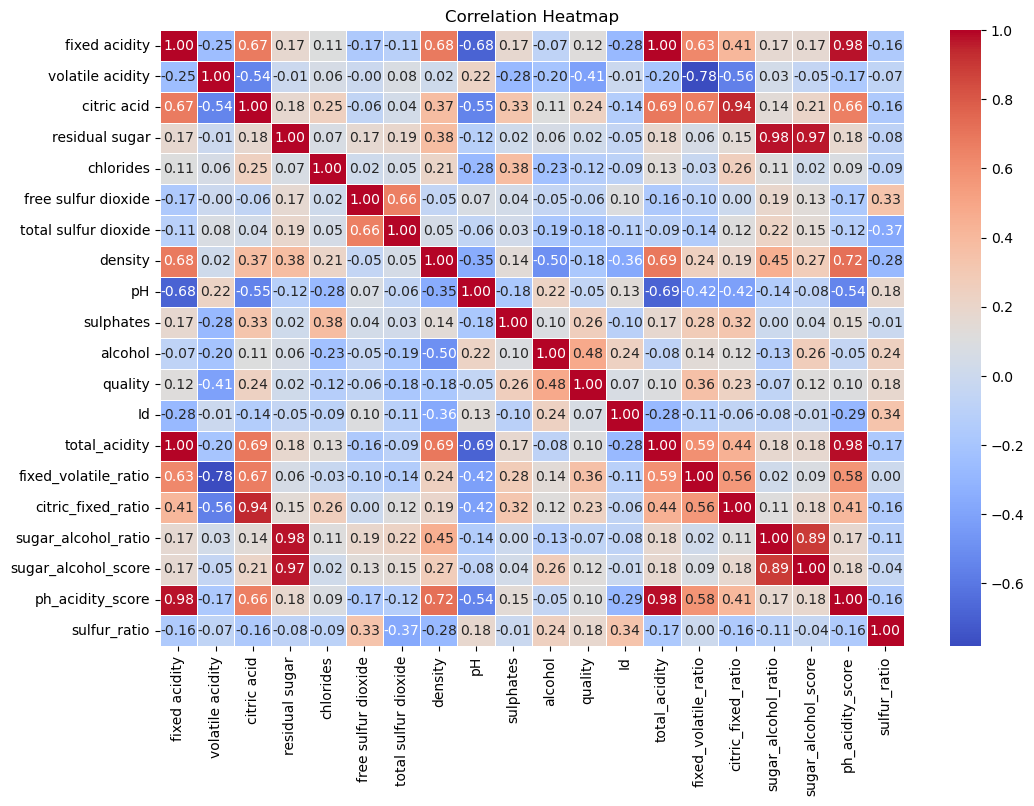

In [16]:
import seaborn as sns

import matplotlib.pyplot as plt

corr_matrix = X_recovered.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
def find_high_correlations(df, threshold=0.75):
    """
    Yüksek korelasyonları bulur. Korelasyon değeri threshold değerinden 
    büyükse bu iki özellik arasında yüksek korelasyon vardır.
    """
    
    corr_matrix = df.corr()
    high_corr_pairs = []
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                high_corr_pairs.append({
                    'feature1': corr_matrix.columns[i],
                    'feature2': corr_matrix.columns[j],
                    'correlation': corr_matrix.iloc[i,j]
                })
    
    corr_df = pd.DataFrame(high_corr_pairs)
    corr_df['abs_corr'] = abs(corr_df['correlation'])
    corr_df = corr_df.sort_values('abs_corr', ascending=False)
    corr_df = corr_df.drop('abs_corr', axis=1)
    
    return corr_df

# treshold 0.75 olarak ayarlandi
high_correlations = find_high_correlations(X_recovered)
print(high_correlations)

              feature1              feature2  correlation
0        fixed acidity         total_acidity     0.996324
6        total_acidity      ph_acidity_score     0.981203
1        fixed acidity      ph_acidity_score     0.977286
4       residual sugar   sugar_alcohol_ratio     0.975839
5       residual sugar   sugar_alcohol_score     0.970528
3          citric acid    citric_fixed_ratio     0.939873
7  sugar_alcohol_ratio   sugar_alcohol_score     0.894814
2     volatile acidity  fixed_volatile_ratio    -0.781273


In [ ]:
# Yüksek korelasyonlu özelliklerin listesi
remove_features = high_correlations['feature2'].unique()
print(remove_features)

['total_acidity' 'ph_acidity_score' 'sugar_alcohol_ratio'
 'sugar_alcohol_score' 'citric_fixed_ratio' 'fixed_volatile_ratio']


In [ ]:
# Yüksek korelasyonlu özelliklerin çıkarılması
X_removed = X_recovered.drop(columns=remove_features)

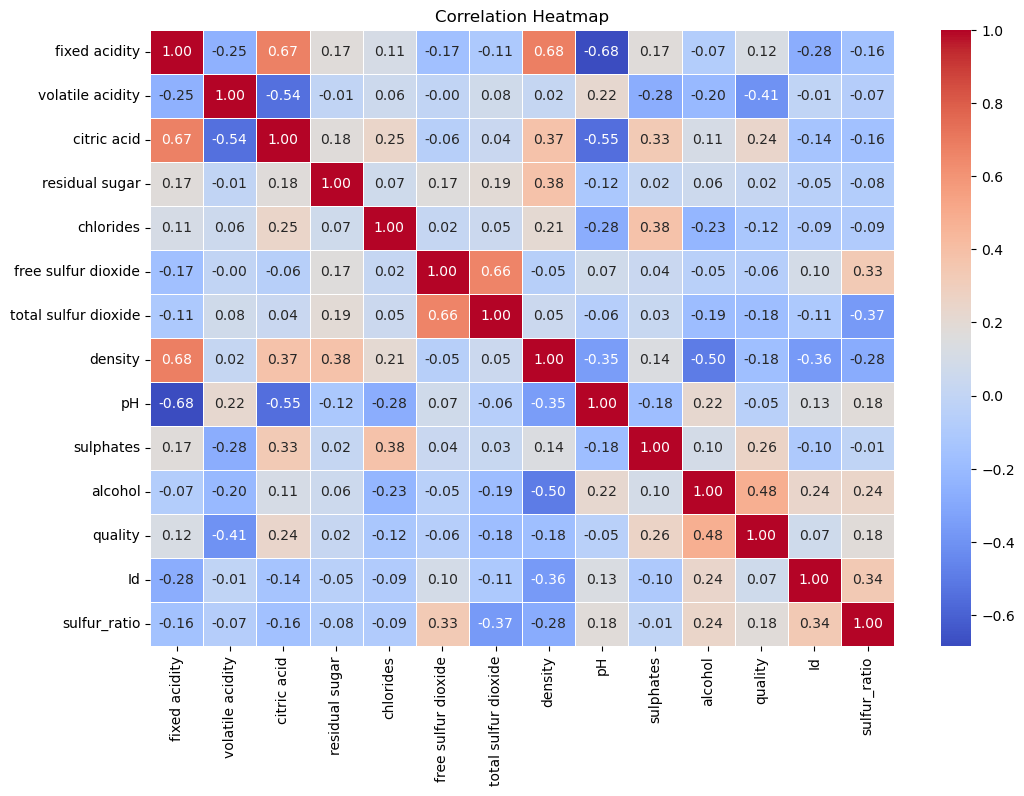

In [ ]:
# Korelasyon matrisinin son hali
corr_matrix_removed = X_removed.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_removed, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# **OUTLIER VALUES**

In [32]:
from sklearn.neighbors import LocalOutlierFactor

X = X_removed.drop(columns=['quality',"Id"])
y = X_removed['quality']

lf = LocalOutlierFactor(n_neighbors=5)
outlier_label = lf.fit_predict(X)

non_outlier_mask = outlier_label != -1

In [36]:
print("toplam veri sayısı: ", len(X))
print("aykırı olmayan değerlerin sayısı: ", len(X[non_outlier_mask]))
print("aykırı değerlerin sayısı: ", len(X[~non_outlier_mask]))

toplam veri sayısı:  1143
aykırı olmayan değerlerin sayısı:  1087
aykırı değerlerin sayısı:  56


In [ ]:
X_cleaned = X[non_outlier_mask]
y_cleaned = y[non_outlier_mask]

clean_data = pd.concat([X_cleaned, y_cleaned], axis=1)

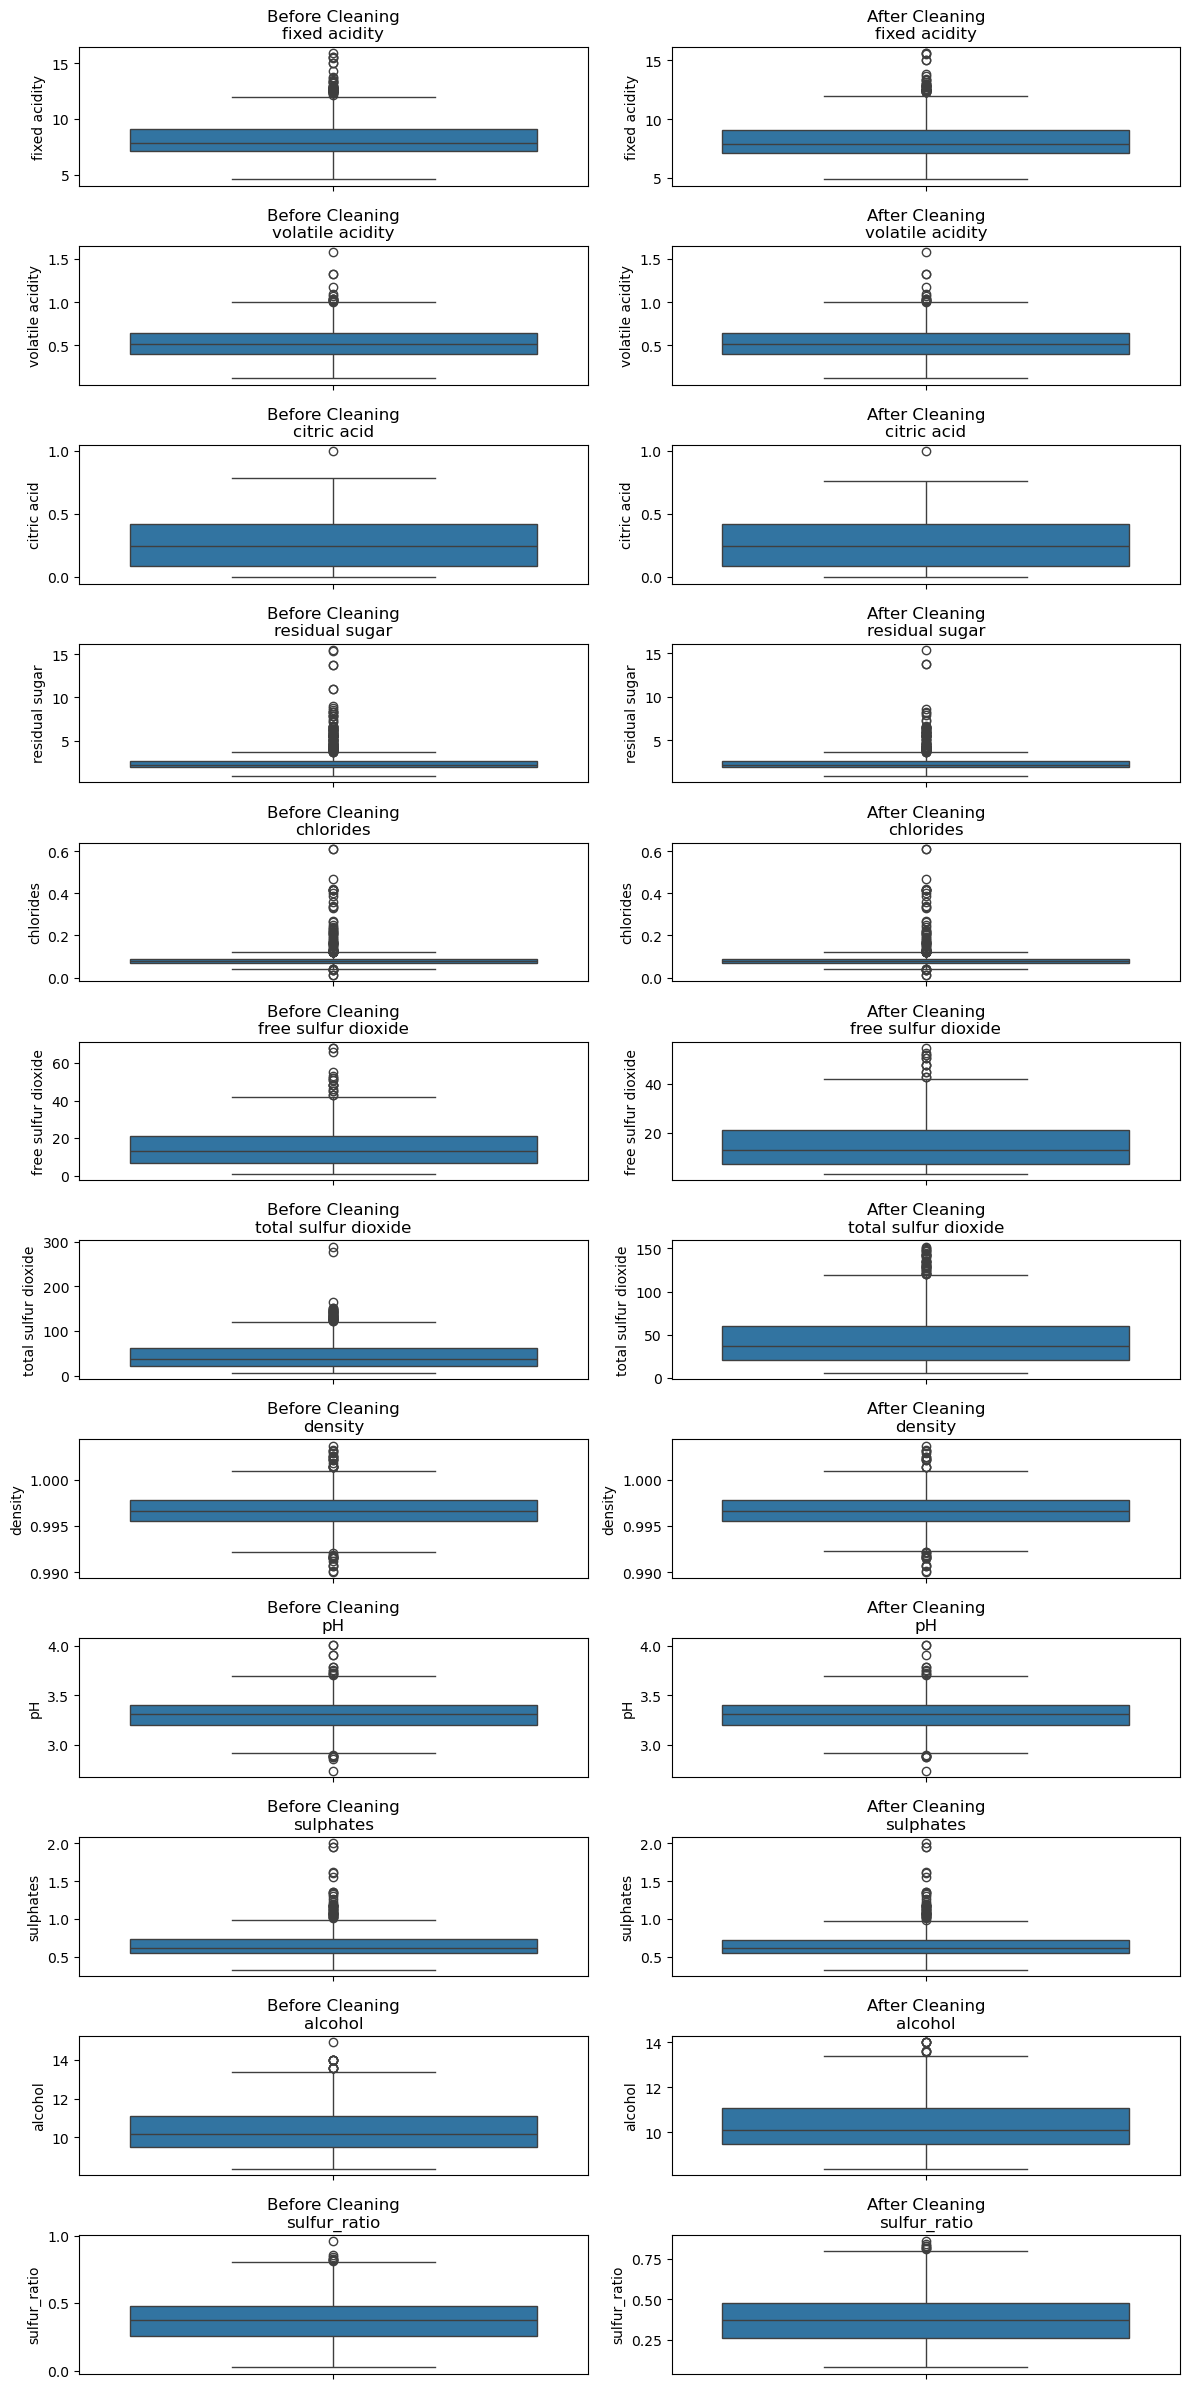

In [40]:
import matplotlib.pyplot as plt

# Aykırı değerler temizlenmeden önceki veriler
data_before = X

# Aykırı değerler temizlendikten sonraki veriler
data_after = X_cleaned

# Özelliklerin box plotlarını çizmek için
fig, axes = plt.subplots(nrows=len(data_before.columns), ncols=2, figsize=(12, 2 * len(data_before.columns)), sharex=True)

for i, column in enumerate(data_before.columns):
    # Aykırı değerler temizlenmeden önceki box plot
    sns.boxplot(data=data_before, y=column, ax=axes[i, 0])
    axes[i, 0].set_title(f'Before Cleaning\n{column}')
    
    # Aykırı değerler temizlendikten sonraki box plot
    sns.boxplot(data=data_after, y=column, ax=axes[i, 1])
    axes[i, 1].set_title(f'After Cleaning\n{column}')

plt.tight_layout()
plt.show()

In [41]:
clean_data.to_csv(r"D:\gitClones\Machine-learning-assignment\data\WineQT_cleaned.csv", index=False)